# LowLou Metric

In [ ]:
import pyvista as pv
import matplotlib.pyplot as plt

In [ ]:
b_vtk_path = '01_input/lowlou_128128128/b.vtk'
b_mesh = pv.read(b_vtk_path)
b_mesh

ImageData (0x7fa5abc07820)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   128, 128, 128
  Spacing:      1.575e-02, 1.575e-02, 1.575e-02
  N Arrays:     3

In [ ]:
B_pinn_vtk_path = '03_eval/lowlou_128128128/PINN/B_pinn.vtk'
B_pinn_mesh = pv.read(B_pinn_vtk_path)
B_pinn_mesh

ImageData (0x7fa5abc076a0)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 1.270e+02
  Z Bounds:     0.000e+00, 1.270e+02
  Dimensions:   128, 128, 128
  Spacing:      1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:     2

In [ ]:
B_spinn_vtk_path = '03_eval/lowlou_128128128/SPINN/B_spinn.vtk'
B_spinn_mesh = pv.read(B_spinn_vtk_path)
B_spinn_mesh

StructuredGrid (0x7fa5abc07d60)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 1.270e+02
  Z Bounds:     0.000e+00, 1.270e+02
  Dimensions:   128, 128, 128
  N Arrays:     2

In [ ]:
b_pot_vtk_path = '01_input/lowlou_128128128/b_pot.vtk'

In [ ]:
Nx, Ny, Nz = b_mesh.dimensions

## Calculate Potential field

### get ndarray

<matplotlib.image.AxesImage>

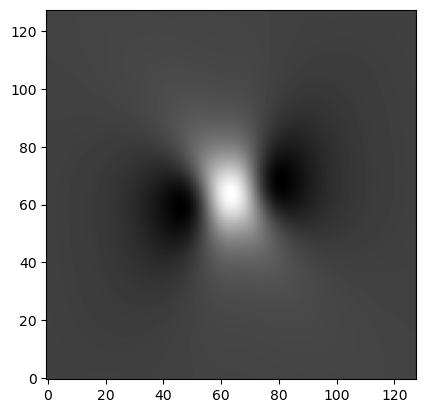

In [ ]:
b = b_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
bz_bottom = b[:, :, 0, 2]
plt.imshow(bz_bottom.transpose(), origin='lower', cmap='gray')

<matplotlib.image.AxesImage>

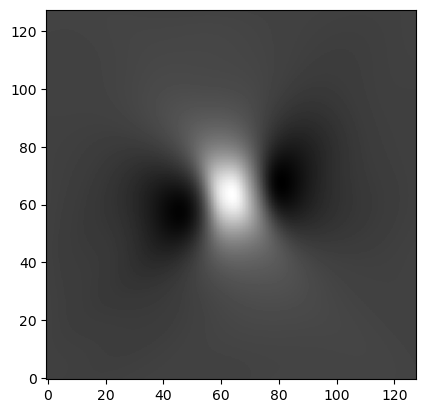

In [ ]:
B_pinn = B_pinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
plt.imshow(B_pinn[:, :, 0, 2].transpose(), origin='lower', cmap='gray')

<matplotlib.image.AxesImage>

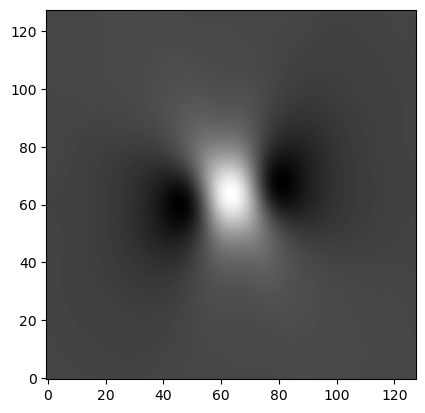

In [ ]:
B_spinn = B_spinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
plt.imshow(B_spinn[:, :, 0, 2].transpose(), origin='lower', cmap='gray')

### vtk

In [ ]:
from nf2.potential.potential_field import get_potential_field
from zpinn.pinn_nf2_cleanup import create_coordinates
import numpy as np 

In [ ]:
b_pot = get_potential_field(bz_bottom, Nz)

Potential Field: 100%|██████████| 1024/1024 [00:13<00:00, 73.74it/s]


In [ ]:
Bx = b_pot[..., 0]
By = b_pot[..., 1]
Bz = b_pot[..., 2]

co_bounds = (0, Nx-1, 0, Ny-1, 0, Nz-1)
co_coords = create_coordinates(co_bounds).reshape(-1, 3)
co_coord = co_coords.reshape(Nx, Ny, Nz, 3)
x = co_coord[..., 0]
y = co_coord[..., 1]
z = co_coord[..., 2]
mesh = pv.StructuredGrid(x, y, z)
vectors = np.stack([Bx, By, Bz], axis=-1).transpose(2, 1, 0, 3).reshape(-1, 3)
mesh['B'] = vectors
mesh.active_vectors_name = 'B'
magnitude = np.linalg.norm(vectors, axis=-1)
mesh['mag'] = magnitude
mesh.active_scalars_name = 'mag'

mesh

StructuredGrid (0x7f6cd1d9f5e0)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 1.270e+02
  Z Bounds:     0.000e+00, 1.270e+02
  Dimensions:   128, 128, 128
  N Arrays:     2

In [ ]:
mesh.save(b_pot_vtk_path)

In [ ]:
b_pot = mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
plt.imshow(b_pot[:, :, 0, 2].transpose(), origin='lower', cmap='gray')

## Viz

In [ ]:
from zpinn.pinn_nf2_visualization import draw_grid

In [ ]:
vmin = -50
vmax = 200

In [ ]:
pv.set_jupyter_backend('static')

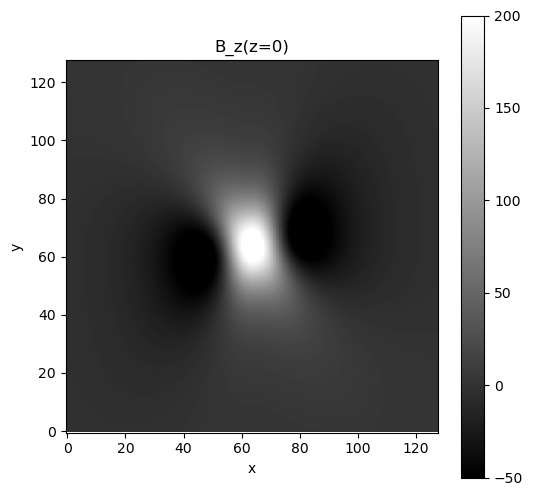

In [ ]:
draw_grid(b_mesh).plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

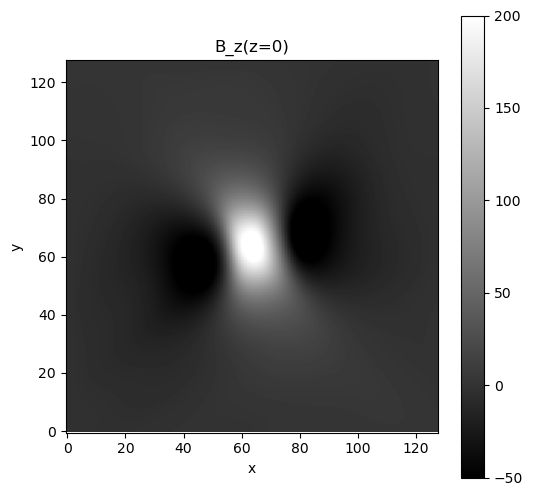

In [ ]:
draw_grid(B_pinn_mesh).plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

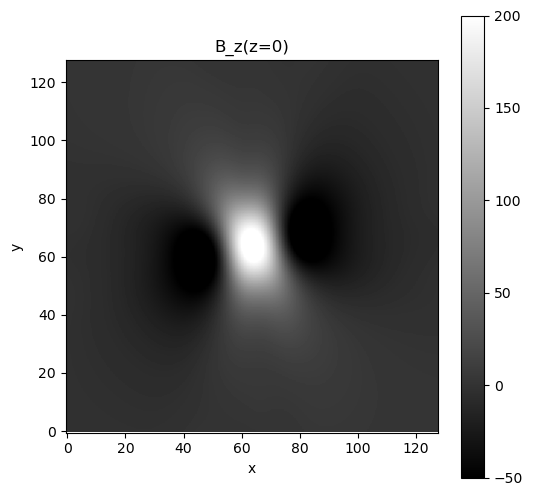

In [ ]:
draw_grid(B_spinn_mesh).plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

In [ ]:
b_pot_mesh = pv.read(b_pot_vtk_path)

In [ ]:
b_pot_grid = draw_grid(b_pot_mesh)

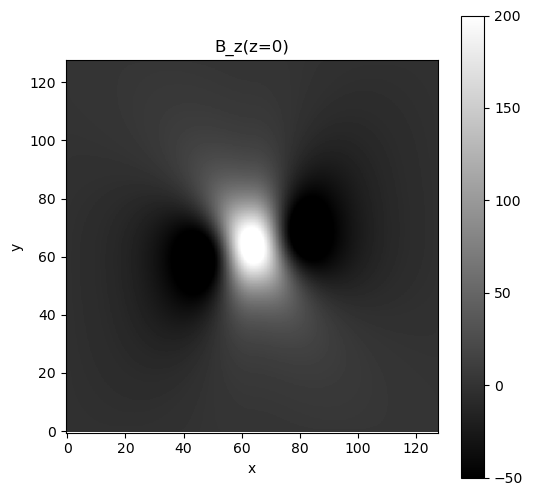

In [ ]:
b_pot_grid.plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

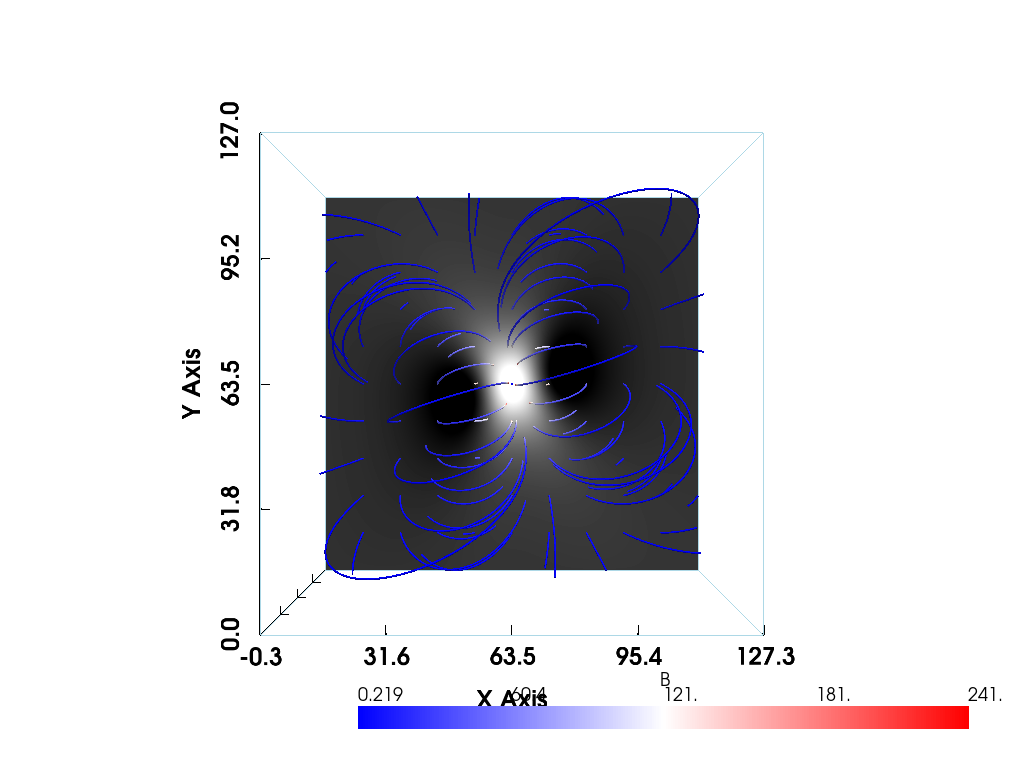

In [ ]:
b_pot_grid.pv_streamline_Bz(camera_position='xy', i_resolution=10, j_resolution=10, vmin=vmin, vmax=vmax)

## Evaluate metric

In [ ]:
import pandas as pd
from zpinn.pinn_nf2_metric import metric_df

In [ ]:
b_pot_mesh = pv.read(b_pot_vtk_path)

In [ ]:
b = b_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
b_pot = b_pot_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
B_pinn = B_pinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
B_spinn = B_spinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)

In [ ]:
df_b = metric_df(B=b, b=b, B_potential=b_pot, iteration=-2)
df_bp = metric_df(B=b_pot, b=b, B_potential=b_pot, iteration=-1)
df = pd.concat([df_b, df_bp], ignore_index=True)
df

,iteration,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2,curlB
0,-2,1.000000,1.000000,1.000000,1.000000,1.000000,1.514066,0.170259,1.657477e-02,0.057219,1.000000e+00
1,-1,0.893936,0.897016,0.456951,0.373536,0.660473,1.000000,0.848864,1.321348e-12,0.063306,5.824621e-07


In [ ]:
iterations = 2000

In [ ]:
df_new = metric_df(B=B_pinn, b=b, B_potential=b_pot, iteration=f'pinn_{iterations}')
df = pd.concat([df, df_new], ignore_index=True)
df

,iteration,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2,curlB
0,-2,1.000000,1.000000,1.000000,1.000000,1.000000,1.514066,0.170259,1.657477e-02,0.057219,1.000000e+00
1,-1,0.893936,0.897016,0.456951,0.373536,0.660473,1.000000,0.848864,1.321348e-12,0.063306,5.824621e-07
2,pinn_2000,0.814134,0.196009,-0.348036,-1.911993,2.341541,3.545248,0.721803,8.679570e-01,0.863758,3.251239e+00


In [ ]:
df_new = metric_df(B=B_spinn, b=b, B_potential=b_pot, iteration=f'spinn_{iterations}')
df = pd.concat([df, df_new], ignore_index=True)
df

,iteration,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2,curlB
0,-2,1.000000,1.000000,1.000000,1.000000,1.000000,1.514066,0.170259,1.657477e-02,0.057219,1.000000e+00
1,-1,0.893936,0.897016,0.456951,0.373536,0.660473,1.000000,0.848864,1.321348e-12,0.063306,5.824621e-07
2,pinn_2000,0.814134,0.196009,-0.348036,-1.911993,2.341541,3.545248,0.721803,8.679570e-01,0.863758,3.251239e+00
3,spinn_2000,0.989354,0.936852,0.727228,0.525101,0.859434,1.301240,0.082055,5.981514e-04,0.000237,8.127559e-01
